In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
location = "DC_Properties.csv"
df = pd.read_csv(location)
df

/Users/vannesadamota/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df2= df[['BEDRM','BATHRM','GBA','PRICE']].round()
df2.head()

,BEDRM,BATHRM,GBA,PRICE
0,4,4,2522.0,1095000.0
1,5,3,2567.0,NaN
2,5,3,2522.0,2100000.0
3,5,3,2484.0,1602000.0
4,3,2,5255.0,NaN


In [4]:
df2 = df2.dropna()

In [5]:
meanprice = df2['PRICE'].mean()
stdprice = df2['PRICE'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf2= df2.copy()
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] > toprange].index)
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] < botrange].index)



In [6]:
from sklearn.linear_model import LinearRegression
X = copydf2.drop('PRICE', axis=1)
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
lm.fit(X, copydf2['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
print('Estimated Intercept coefficient:', lm.intercept_) #all things being 0 price would still be $86,788.

Estimated Intercept coefficient: 86778.77646374924


In [9]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 3


In [10]:
pd.DataFrame(list(zip(X.columns,lm.coef_)), columns= ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,BEDRM,-16429.110110
1,BATHRM,110319.724894
2,GBA,147.315731


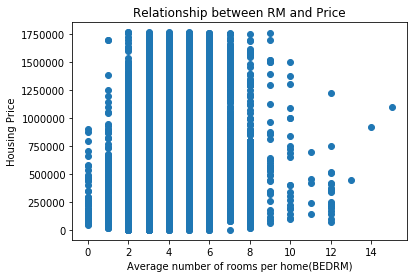

In [11]:
plt.scatter(copydf2.BEDRM, copydf2.PRICE)
plt.xlabel('Average number of rooms per home(BEDRM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')  
plt.show()

In [12]:
lm.predict(X)[0:5]

array([833871.50968933, 701524.67689988, 705726.58132021, 587656.42884297,
       765024.56921007])

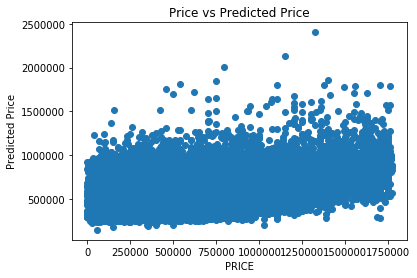

In [13]:
plt.scatter(copydf2.PRICE, lm.predict(X) )
plt.xlabel('PRICE')
plt.ylabel('Predicted Price')
plt.title('Price vs Predicted Price')  
plt.show()

In [14]:
df4= df[['BEDRM','BATHRM','GBA','PRICE','WARD']].round()
df4.head()

,BEDRM,BATHRM,GBA,PRICE,WARD
0,4,4,2522.0,1095000.0,Ward 2
1,5,3,2567.0,NaN,Ward 2
2,5,3,2522.0,2100000.0,Ward 2
3,5,3,2484.0,1602000.0,Ward 2
4,3,2,5255.0,NaN,Ward 2


In [15]:
df4.drop_duplicates()

,BEDRM,BATHRM,GBA,PRICE,WARD
0,4,4,2522.0,1095000.0,Ward 2
1,5,3,2567.0,NaN,Ward 2
2,5,3,2522.0,2100000.0,Ward 2
3,5,3,2484.0,1602000.0,Ward 2
4,3,2,5255.0,NaN,Ward 2
5,5,3,5344.0,1950000.0,Ward 2
6,2,1,1260.0,NaN,Ward 2
7,4,3,2401.0,1050000.0,Ward 2
8,3,3,1488.0,1430000.0,Ward 2
9,2,1,1590.0,NaN,Ward 2


In [16]:
df4.dropna()

,BEDRM,BATHRM,GBA,PRICE,WARD
0,4,4,2522.0,1095000.0,Ward 2
2,5,3,2522.0,2100000.0,Ward 2
3,5,3,2484.0,1602000.0,Ward 2
5,5,3,5344.0,1950000.0,Ward 2
7,4,3,2401.0,1050000.0,Ward 2
8,3,3,1488.0,1430000.0,Ward 2
14,3,3,2692.0,1325000.0,Ward 2
16,3,3,1662.0,1240000.0,Ward 2
19,3,3,1598.0,592250.0,Ward 2
20,5,3,3465.0,33232.0,Ward 2


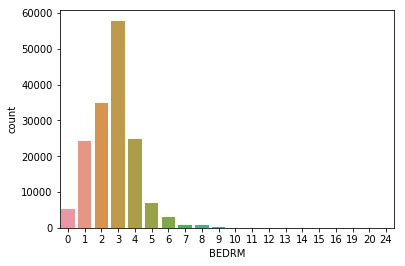

In [17]:
sns.countplot(x='BEDRM', data=df4)

/Users/vannesadamota/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


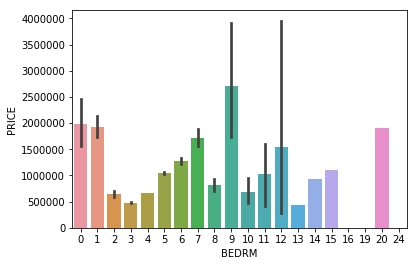

In [18]:
sns.barplot('BEDRM', 'PRICE', data= df4)

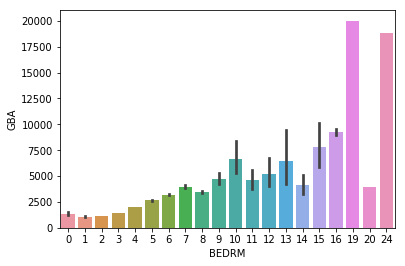

In [19]:
sns.barplot('BEDRM', 'GBA', data= df4)

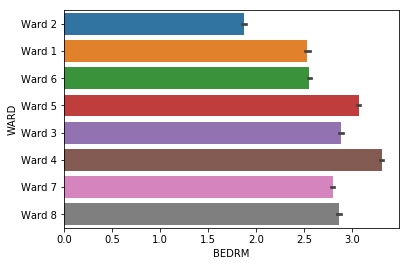

In [20]:
sns.barplot('BEDRM', 'WARD', data= df4)

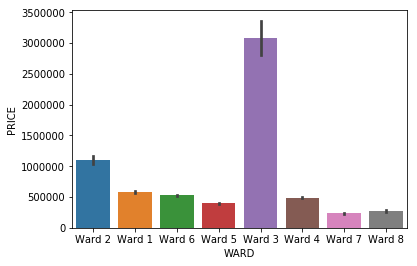

In [21]:
sns.barplot('WARD', 'PRICE', data= df4)

In [22]:
def score_to_numeric(x):
    if x=='Ward 1':
        return 1
    if x== "Ward 2":
        return 2
    if x== "Ward 3":
        return 3
    if x=="Ward 4":
        return 4
    if x== "Ward 5":
        return 5
    if x=="Ward 6":
        return 6
    if x== "Ward 7":
        return 7
    if x== "Ward 8":
        return 8
df4['Ward_val']= df4["WARD"].apply(score_to_numeric)
df4.tail()

,BEDRM,BATHRM,GBA,PRICE,WARD,Ward_val
158952,1,1,NaN,399900.0,Ward 6,6.0
158953,2,1,NaN,416000.0,Ward 6,6.0
158954,2,2,NaN,600000.0,Ward 6,6.0
158955,0,1,NaN,215100.0,Ward 6,6.0
158956,0,1,NaN,NaN,Ward 6,6.0


In [23]:
df5= df4.drop('WARD', axis=1)

In [24]:
df5.dropna( axis=0, how= 'all')

,BEDRM,BATHRM,GBA,PRICE,Ward_val
0,4,4,2522.0,1095000.0,2.0
1,5,3,2567.0,NaN,2.0
2,5,3,2522.0,2100000.0,2.0
3,5,3,2484.0,1602000.0,2.0
4,3,2,5255.0,NaN,2.0
5,5,3,5344.0,1950000.0,2.0
6,2,1,1260.0,NaN,2.0
7,4,3,2401.0,1050000.0,2.0
8,3,3,1488.0,1430000.0,2.0
9,2,1,1590.0,NaN,2.0


In [25]:
df6=df5[['BEDRM','BATHRM','PRICE','Ward_val']]
df6.head() 

,BEDRM,BATHRM,PRICE,Ward_val
0,4,4,1095000.0,2.0
1,5,3,NaN,2.0
2,5,3,2100000.0,2.0
3,5,3,1602000.0,2.0
4,3,2,NaN,2.0


In [26]:
df6.isnull().sum()

BEDRM           0
BATHRM          0
PRICE       60741
Ward_val        1
dtype: int64

In [27]:
#df6["PRICE"].fillna(df6.groupby(['BEDRM','BATHRM','Ward_val'])["PRICE"]).transform('mean'), inplace= True) did not work returned invalid syntax

df6["PRICE"].fillna(0, inplace= True)

/Users/vannesadamota/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
df6["Ward_val"].fillna(1, inplace=True)

In [29]:
df6.columns

Index(['BEDRM', 'BATHRM', 'PRICE', 'Ward_val'], dtype='object')

In [30]:
y=df6["PRICE"]

In [31]:
x= df6.drop(["PRICE"], axis=1)

In [32]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=10)


In [33]:
model= tree.DecisionTreeClassifier() 

In [34]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
y_predict=model.predict(x_test)

In [36]:
accuracy_score(y_test, y_predict)

0.3851912430800201

In [37]:
#logistis Regression
y= df6["PRICE"]


In [38]:
x= df6.drop(['PRICE'], axis=1)


In [39]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=10)


In [40]:
LogReg= LogisticRegression()


In [ ]:
LogReg.fit(x_train, y_train)

/Users/vannesadamota/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vannesadamota/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
logReg.score(x_train, y_train)